In [42]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
# Load the trained model
model = load_model("lstm_model.h5")

In [44]:
# Load your dataset
new_data = pd.read_csv("C:\\Users\\krits\\vscodeWorkspaces\\Jupyter_Notebook\\LSTM_Model\\CSV_SIGNAL\\New folder\\20250321_280_350V_25A_1.csv")  # Adjust the filename


In [45]:
new_data

,DateTime,Name,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage,Unnamed: 9
0,20250321 11:07:32,280_350V_25A_1,300,9.4,0.09,25.0,279.4,0.0,218.5,NaN
1,20250321 11:07:33,280_350V_25A_1,300,9.4,0.09,25.0,279.4,0.0,218.5,NaN
2,20250321 11:07:34,280_350V_25A_1,300,9.4,0.08,25.0,279.4,0.0,219.0,NaN
3,20250321 11:07:34,280_350V_25A_1,300,78.5,0.09,25.0,279.5,1.3,219.0,NaN
4,20250321 11:07:35,280_350V_25A_1,300,549.7,0.09,25.0,279.4,0.6,219.0,NaN
...,...,...,...,...,...,...,...,...,...,...
122,20250321 11:08:49,280_350V_25A_1,135,701.5,24.98,7000.0,279.8,10.7,218.5,NaN
123,20250321 11:08:50,280_350V_25A_1,134,702.5,25.00,6992.0,279.8,10.8,218.5,NaN
124,20250321 11:08:50,280_350V_25A_1,135,702.2,24.99,6992.5,279.6,10.8,218.5,NaN
125,20250321 11:08:51,280_350V_25A_1,134,703.1,25.00,6989.5,279.7,10.8,218.5,NaN


In [46]:
new_data.drop(columns=['DateTime','Name',"Unnamed: 9"], inplace=True)

In [47]:
new_data

,HV_SwitchingFreq_Rail1,VS_Bulk_HvDc,CS_Shunt_HVDC_R1,HV_OutPwr,VS_Vout_Sense_HVDC,MainsRMSCurrent,MainsRMSVoltage
0,300,9.4,0.09,25.0,279.4,0.0,218.5
1,300,9.4,0.09,25.0,279.4,0.0,218.5
2,300,9.4,0.08,25.0,279.4,0.0,219.0
3,300,78.5,0.09,25.0,279.5,1.3,219.0
4,300,549.7,0.09,25.0,279.4,0.6,219.0
...,...,...,...,...,...,...,...
122,135,701.5,24.98,7000.0,279.8,10.7,218.5
123,134,702.5,25.00,6992.0,279.8,10.8,218.5
124,135,702.2,24.99,6992.5,279.6,10.8,218.5
125,134,703.1,25.00,6989.5,279.7,10.8,218.5


In [48]:
# # Use MinMaxScaler to normalize the data
scal1 = (new_data['HV_SwitchingFreq_Rail1'][0] - new_data['HV_SwitchingFreq_Rail1'].to_numpy().min())/(new_data['HV_SwitchingFreq_Rail1'].to_numpy().max() - new_data['HV_SwitchingFreq_Rail1'].to_numpy().min())
scal1

1.0

In [49]:
# Use MinMaxScaler to normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))  # Use the same scaler as before
features = ['HV_SwitchingFreq_Rail1', 'VS_Bulk_HvDc', 'CS_Shunt_HVDC_R1', 
            'HV_OutPwr', 'VS_Vout_Sense_HVDC', 'MainsRMSCurrent', 'MainsRMSVoltage']

scaled_new_data = scaler.fit_transform(new_data[features])  # Normalize



In [50]:
# Prepare the data for LSTM
def create_sequences(data, sequence_length=3):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length, 0])  # Assuming the target is 'HV_SwitchingFreq_Rail1'
    return np.array(X), np.array(y)

In [51]:
sequence_length = 3
X_new, y_new = create_sequences(scaled_new_data)  # Get X and y

X_new = X_new.reshape((X_new.shape[0], X_new.shape[1], X_new.shape[2]))  # Ensure correct shape


In [52]:
predictions = model.predict(X_new)



4/4 [==============================] - 0s 2ms/step


In [53]:
# Create an empty array to match the number of features
zeros_array = np.zeros((predictions.shape[0], len(features) - 1))

# Place predictions in the correct column index (assuming index 0 is the target)
predictions_rescaled = scaler.inverse_transform(np.hstack((predictions, zeros_array)))[:, 0]

# Convert y_new back to original scale
y_new_rescaled = scaler.inverse_transform(np.hstack((y_new.reshape(-1, 1), zeros_array)))[:, 0]


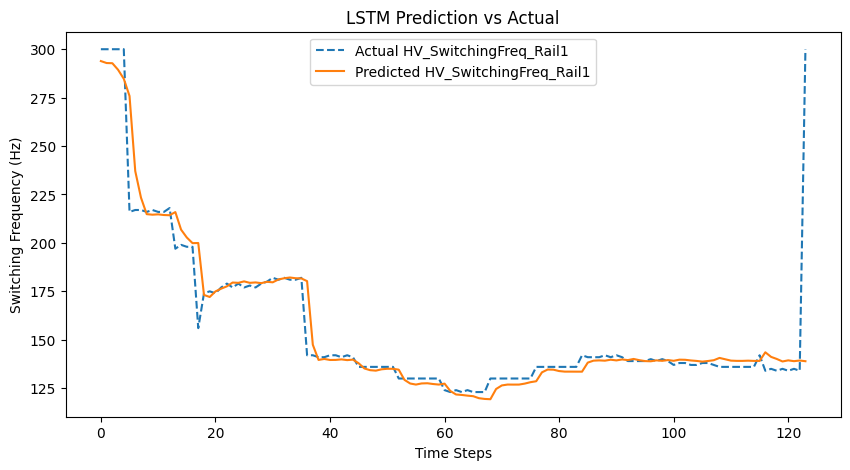

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(y_new_rescaled, label="Actual HV_SwitchingFreq_Rail1", linestyle="dashed")
plt.plot(predictions_rescaled, label="Predicted HV_SwitchingFreq_Rail1")
plt.xlabel("Time Steps")
plt.ylabel("Switching Frequency (Hz)")
plt.title("LSTM Prediction vs Actual")
plt.legend()
plt.show()



In [55]:
mae = mean_absolute_error(y_new_rescaled, predictions_rescaled)
mse = mean_squared_error(y_new_rescaled, predictions_rescaled)
r2 = r2_score(y_new_rescaled, predictions_rescaled)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Absolute Error: 5.4450812592291316
Mean Squared Error: 284.8948345667357
R² Score: 0.8319908144770632
